In [1]:
from scipy.sparse import diags
import random
import numpy as np
import scipy as sc
import pandas as pd
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
%matplotlib inline

import sys
sys.path.insert(0, '../python/')
from opt_utils import *
from grad_utils import *
from ks_utils import *
from simulation_utils import *
from cv_utils import *

# Generate synethic data

In [2]:
N = 50 # number of teams
T = 50 # number of seasons/rounds/years
tn = [1] * int(T * N * (N - 1)/2) # number of games between each pair of teams

### Gaussian Process

In [3]:
random.seed(0)
np.random.seed(0)
P_list = make_prob_matrix(T,N,r = 1,alpha = 1,mu = [0,0.2])
game_matrix_list = get_game_matrix_list_from_P(tn,P_list)

In [4]:
data = game_matrix_list # shape: T*N*N

## Oracle estimator

In [5]:
# vanilla BT
random.seed(0)
np.random.seed(0)
_, beta_oracle = gd_bt(data = P_list)

Text(0,0.5,'latent parameter')

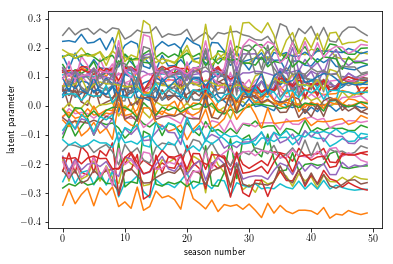

In [6]:
latent = beta_oracle
for i in range(N):
    plt.plot(latent[:,i], label="team %d"%i)
plt.xlabel("season number")
plt.ylabel("latent parameter")
# plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03, 1, 0))

## Kernel method

## $h = T^{-3/4}$

In [7]:
T**(-3/4)

0.053182958969449884

In [8]:
T, N = data.shape[0:2]
ks_data = kernel_smooth(data,1/6 * T**(-1/5))

In [9]:
ks_data[1,:,:]

array([[0.        , 0.17366345, 0.48414317, ..., 0.50266834, 0.44650496,
        0.9677657 ],
       [0.82633655, 0.        , 0.35251427, ..., 0.49902485, 0.15680002,
        0.6496552 ],
       [0.51585683, 0.64748573, 0.        , ..., 0.68953293, 0.5782072 ,
        0.60186349],
       ...,
       [0.49733166, 0.50097515, 0.31046707, ..., 0.        , 0.73564848,
        0.70505943],
       [0.55349504, 0.84319998, 0.4217928 , ..., 0.26435152, 0.        ,
        0.46027193],
       [0.0322343 , 0.3503448 , 0.39813651, ..., 0.29494057, 0.53972807,
        0.        ]])

In [10]:
objective_pgd, beta_pgd = gd_bt(data = ks_data,verbose=True)

initial objective value: 42455.264809
1-th GD, objective value: 42035.721006
2-th GD, objective value: 42014.111872
3-th GD, objective value: 42012.830135
4-th GD, objective value: 42012.749892
5-th GD, objective value: 42012.744750
6-th GD, objective value: 42012.744415
7-th GD, objective value: 42012.744393
8-th GD, objective value: 42012.744391
9-th GD, objective value: 42012.744391
10-th GD, objective value: 42012.744391
11-th GD, objective value: 42012.744391
12-th GD, objective value: 42012.744391
13-th GD, objective value: 42012.744391
14-th GD, objective value: 42012.744391
Converged!


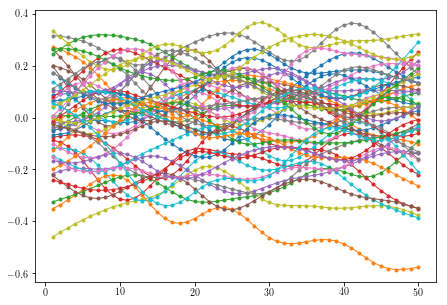

In [11]:
T, N = data.shape[0:2]
beta = beta_pgd.reshape((T,N))
f = plt.figure(1, figsize = (9,5))
ax = plt.subplot(111)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],marker = '.',label = 'Team' + str(i),linewidth=1)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()
# f.savefig("l2_sq_solution.pdf", bbox_inches='tight')

## LOOCV

In [12]:
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
h = 0.0311
loo_nll_DBT, beta_DBT, loo_prob_DBT = loo_DBT(data, h, gd_bt, num_loo = 200, return_prob = True, out = "notebook")

print("--- %s seconds ---" % (time.time() - start_time))

1-th cv done
2-th cv done
3-th cv done
4-th cv done
5-th cv done
6-th cv done
7-th cv done
8-th cv done
9-th cv done
10-th cv done
11-th cv done
12-th cv done
13-th cv done
14-th cv done
15-th cv done
16-th cv done
17-th cv done
18-th cv done
19-th cv done
20-th cv done
21-th cv done
22-th cv done
23-th cv done
24-th cv done
25-th cv done
26-th cv done
27-th cv done
28-th cv done
29-th cv done
30-th cv done
31-th cv done
32-th cv done
33-th cv done
34-th cv done
35-th cv done
36-th cv done
37-th cv done
38-th cv done
39-th cv done
40-th cv done
41-th cv done
42-th cv done
43-th cv done
44-th cv done
45-th cv done
46-th cv done
47-th cv done
48-th cv done
49-th cv done
50-th cv done
51-th cv done
52-th cv done
53-th cv done
54-th cv done
55-th cv done
56-th cv done
57-th cv done
58-th cv done
59-th cv done
60-th cv done
61-th cv done
62-th cv done
63-th cv done
64-th cv done
65-th cv done
66-th cv done
67-th cv done
68-th cv done
69-th cv done
70-th cv done
71-th cv done
72-th cv done
7

In [13]:
# winrate
random.seed(0)
np.random.seed(0)
winrate = get_winrate(data)
loo_nll_wr, loo_prob_wr = loo_winrate(data)

In [14]:
loo_prob_wr

0.49645833333333317

In [15]:
# vanilla BT
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
objective_vanilla_bt, beta_vanilla_bt = gd_bt(data = data,verbose = True)
loo_nll_vBT, loo_prob_vBT = loo_vBT(data,num_loo = 200)

print("--- %s seconds ---" % (time.time() - start_time))

initial objective value: 42455.264809
1-th GD, objective value: 41025.990338
2-th GD, objective value: 40939.258019
3-th GD, objective value: 40931.340989
4-th GD, objective value: 40930.483507
5-th GD, objective value: 40930.380809
6-th GD, objective value: 40930.367478
7-th GD, objective value: 40930.365616
8-th GD, objective value: 40930.365338
9-th GD, objective value: 40930.365294
10-th GD, objective value: 40930.365287
11-th GD, objective value: 40930.365286
12-th GD, objective value: 40930.365285
13-th GD, objective value: 40930.365285
14-th GD, objective value: 40930.365285
15-th GD, objective value: 40930.365285
16-th GD, objective value: 40930.365285
17-th GD, objective value: 40930.365285
18-th GD, objective value: 40930.365285
19-th GD, objective value: 40930.365285
20-th GD, objective value: 40930.365285
Converged!
--- 5.908789396286011 seconds ---


In [16]:
loo_nll_vBT

0.717300522637566

In [17]:
loo_prob_vBT

0.499234326153416

In [18]:
rank_dif_estimator = [0] * 3
beta_all = [winrate,beta_vanilla_bt,beta_DBT]
for i in range(len(rank_dif_estimator)):
    betai = beta_all[i]
    rank_dif_estimator[i] = np.mean(av_dif_rank(beta_oracle,betai))
rank_dif_estimator

df = pd.DataFrame({'estimator':['winrate','vanilla BT','DBT'],'average rank difference':rank_dif_estimator,
                  'LOO Prob':[loo_prob_wr,loo_prob_vBT,loo_prob_DBT],
                   'LOO nll':[loo_nll_wr,loo_nll_vBT,loo_nll_DBT]})

In [19]:
print(df.to_latex(index_names=True, escape=False, index=False, 
                          column_format='c|c|c|c|', float_format="{:0.2f}".format,
                          header=True, bold_rows=True))

\begin{tabular}{c|c|c|c|}
\toprule
 LOO Prob &  LOO nll &  average rank difference &   estimator \\
\midrule
     0.50 &     0.00 &                    11.90 &     winrate \\
     0.50 &     0.72 &                    11.96 &  vanilla BT \\
     0.50 &     0.69 &                     8.26 &         DBT \\
\bottomrule
\end{tabular}



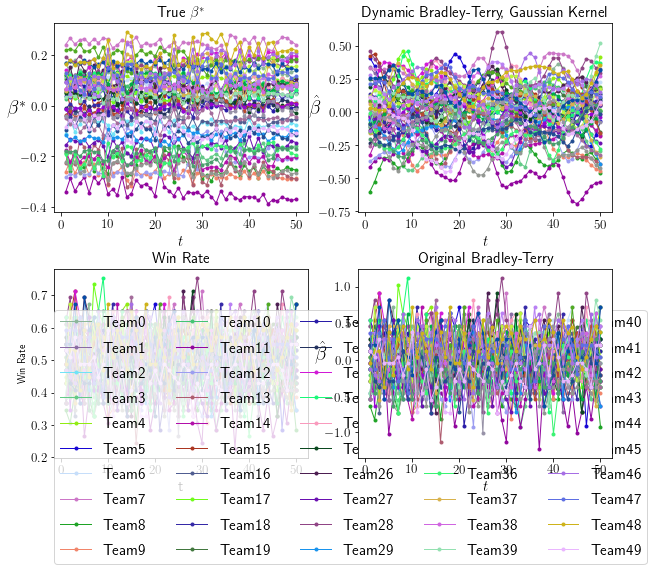

In [20]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_oracle.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"True $\beta^*$",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^*$",fontsize = size_ylabel,rotation = "horizontal")
    bottom, top = plt.ylim()
    
beta = beta_DBT.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
#     plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel("t",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vanilla_bt.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Original Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
# f.savefig("compare.pdf", bbox_inches='tight')

## repeated experiment

In [21]:
import time
start_time = time.time()

random.seed(0)
np.random.seed(0)
B = 20
loo_ks = 200
loo = 200
h_cv_list = []
rank_diff_DBT_list, loo_nll_DBT_list, loo_prob_DBT_list = [], [], []
rank_diff_wr_list, loo_nll_wr_list, loo_prob_wr_list = [], [], []
rank_diff_vBT_list, loo_nll_vBT_list, loo_prob_vBT_list = [], [], []

for b in range(B):
    N = 50 # number of teams
    T = 50 # number of seasons/rounds/years
    tn = [1] * int(T * N * (N - 1)/2) # number of games between each pair of teams

    [alpha,r] = [1,1]
    ##### get beta here #####
    P_list = make_prob_matrix(T,N,r = 1,alpha = 1,mu = [0,0.2])
    P_winrate = P_list.sum(axis=2)
    
    game_matrix_list = get_game_matrix_list_from_P(tn,P_list)
    data = game_matrix_list # shape: T*N*N

    # true beta
    _, beta_oracle = gd_bt(data = P_list)

    # ks cv
    h_list = np.linspace(0.5, 0.05, 10)
    h_cv, nll_cv, beta_cv, prob_cv = loocv_ks(data, h_list, gd_bt, num_loocv = loo_ks, verbose = False,
                                              return_prob = True, out = "notebook")
    h_cv_list.append(h_cv)
    loo_nll_DBT_list.append(max(nll_cv)) 
    loo_prob_DBT_list.append(prob_cv[np.argmax(nll_cv)])
    rank_diff_DBT_list.append(np.mean(av_dif_rank(beta_oracle,beta_cv)))
    
#     # fixed h
#     h_cv = 1/6 * T**(-1/5)
#     nll_cv, beta_cv, prob_cv = loo_DBT(data, h_cv, gd_bt, num_loo = 200, return_prob = True, out = "notebook")

#     h_cv_list.append(h_cv)
#     loo_nll_DBT_list.append(nll_cv) 
#     loo_prob_DBT_list.append(prob_cv)
#     rank_diff_DBT_list.append(np.mean(av_dif_rank(beta_oracle,beta_cv)))
    
    winrate = get_winrate(data)
    loo_nll_wr, loo_prob_wr = loo_winrate(data,num_loo = loo)
    loo_nll_wr_list.append(loo_nll_wr)
    loo_prob_wr_list.append(loo_prob_wr)
    rank_diff_wr_list.append(np.mean(av_dif_rank(beta_oracle,winrate)))
    
    objective_vanilla_bt, beta_vBT = gd_bt(data = data)
    loo_nll_vBT, loo_prob_vBT = loo_vBT(data,num_loo = loo)
    loo_nll_vBT_list.append(loo_nll_vBT)
    loo_prob_vBT_list.append(loo_prob_vBT)
    rank_diff_vBT_list.append(np.mean(av_dif_rank(beta_oracle,beta_vBT)))
    
    print(str(b) + '-th repeat finished.')
    print("--- %s seconds ---" % (time.time() - start_time))
    
    
rank_dif_estimator = [np.mean(rank_diff_wr_list),
                     np.mean(rank_diff_vBT_list),
                     np.mean(rank_diff_DBT_list)]
loo_prob_wr = np.mean(loo_prob_wr_list)
loo_prob_DBT = np.mean(loo_prob_DBT_list)
loo_prob_vBT = np.mean(loo_prob_vBT_list)

loo_nll_wr = np.mean(loo_nll_wr_list)
loo_nll_DBT = np.mean(loo_nll_DBT_list)
loo_nll_vBT = np.mean(loo_nll_vBT_list)

df = pd.DataFrame({'estimator':['winrate','vanilla BT','DBT'],'average rank difference':rank_dif_estimator,
                  'LOO Prob':[loo_prob_wr,loo_prob_vBT,loo_prob_DBT],
                   'LOO nll':[loo_nll_wr,loo_nll_vBT,loo_nll_DBT]})

print("--- %s seconds ---" % (time.time() - start_time))

0-th repeat finished.
--- 8667.855102539062 seconds ---
1-th repeat finished.
--- 17422.046845436096 seconds ---
2-th repeat finished.
--- 26147.00083374977 seconds ---
3-th repeat finished.
--- 34882.83985710144 seconds ---
4-th repeat finished.
--- 43663.85376119614 seconds ---
5-th repeat finished.
--- 52483.68758893013 seconds ---
6-th repeat finished.
--- 61224.49996781349 seconds ---
7-th repeat finished.
--- 70242.64265394211 seconds ---
8-th repeat finished.
--- 79009.67946577072 seconds ---
9-th repeat finished.
--- 87672.79553198814 seconds ---
10-th repeat finished.
--- 96401.26866221428 seconds ---
11-th repeat finished.
--- 105064.20827388763 seconds ---
12-th repeat finished.
--- 113972.41218280792 seconds ---
13-th repeat finished.
--- 122770.2481162548 seconds ---
14-th repeat finished.
--- 131725.37385606766 seconds ---
15-th repeat finished.
--- 140604.25007724762 seconds ---
16-th repeat finished.
--- 149468.59423208237 seconds ---
17-th repeat finished.
--- 158289.6

In [22]:
print(df.to_latex(index_names=True, escape=False, index=False, 
                          column_format='c|c|c|c|', float_format="{:0.2f}".format,
                          header=True, bold_rows=True))

\begin{tabular}{c|c|c|c|}
\toprule
 LOO Prob &  LOO nll &  average rank difference &   estimator \\
\midrule
     0.49 &     0.00 &                    10.68 &     winrate \\
     0.49 &     0.71 &                    10.70 &  vanilla BT \\
     0.49 &     0.68 &                     4.66 &         DBT \\
\bottomrule
\end{tabular}



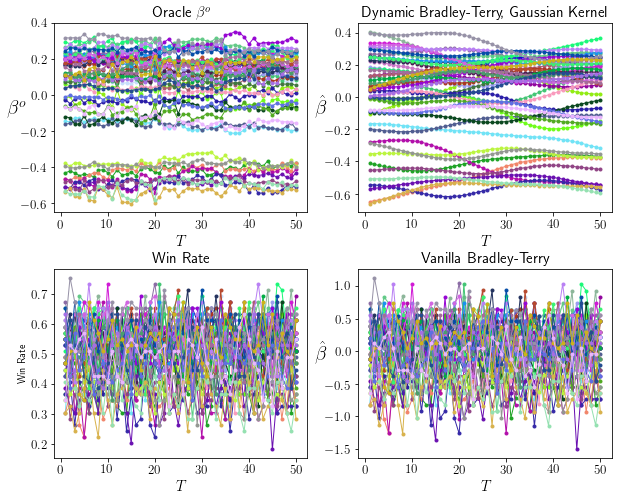

In [23]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_oracle.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Oracle $\beta^o$",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^o$",fontsize = size_ylabel,rotation = "horizontal")
#     bottom, top = plt.ylim()
    
beta = beta_cv.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
#     plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


# ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vBT.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Vanilla Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
f.savefig("compare_beta_NT50_n1_ag.pdf", bbox_inches='tight')

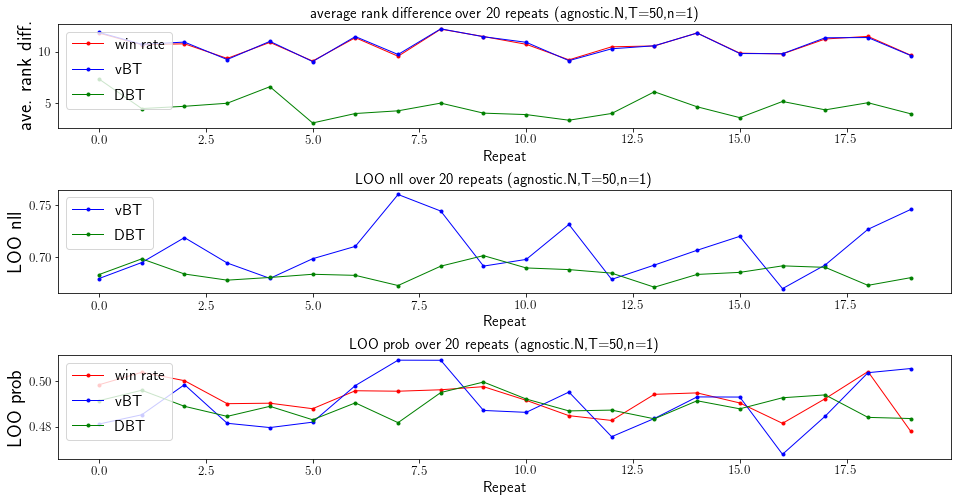

In [24]:
f = plt.figure(1, figsize = (16,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_list = ['red','blue','green']
x_range = [i for i in range(B)]

ax = plt.subplot(311)
ax.plot(x_range,rank_diff_wr_list,c=color_list[0],marker = '.',label = 'win rate',linewidth=1)
ax.plot(x_range,rank_diff_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,rank_diff_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"average rank difference over 20 repeats (agnostic.N,T=50,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"ave. rank diff.",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)
    
ax = plt.subplot(312)
ax.plot(x_range,loo_nll_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,loo_nll_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"LOO nll over 20 repeats (agnostic.N,T=50,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"LOO nll",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)

ax = plt.subplot(313)
ax.plot(x_range,loo_prob_wr_list,c=color_list[0],marker = '.',label = 'win rate',linewidth=1)
ax.plot(x_range,loo_prob_vBT_list,c=color_list[1],marker = '.',label = 'vBT',linewidth=1)
ax.plot(x_range,loo_prob_DBT_list,c=color_list[2],marker = '.',label = 'DBT',linewidth=1)

ax.tick_params(axis='both', which='major', labelsize=size_tick)
plt.title(r"LOO prob over 20 repeats (agnostic.N,T=50,n=1)",fontsize = size_title)
plt.xlabel(r"Repeat",fontsize = size_xlabel); plt.ylabel(r"LOO prob",fontsize = size_ylabel,rotation = "vertical")
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 0.75,ncol = 1)


plt.subplots_adjust(hspace = 0.6)
plt.show()
f.savefig("perform_NT50_n1_ag.pdf", bbox_inches='tight')

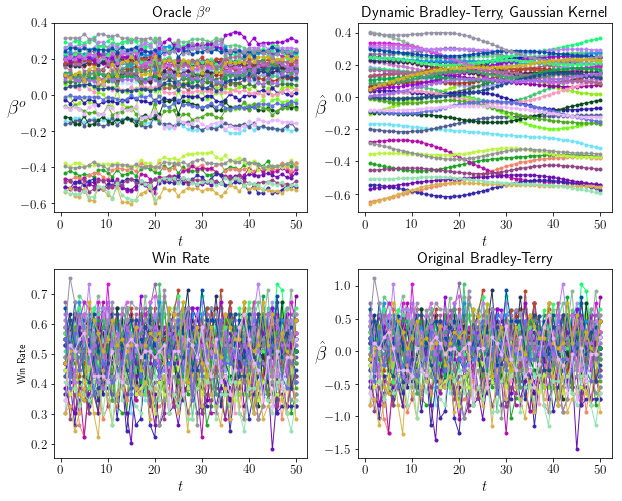

In [25]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (10,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 15.4
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_oracle.reshape((T,N))
ax = plt.subplot(221)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Oracle $\beta^o$",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^o$",fontsize = size_ylabel,rotation = "horizontal")
#     bottom, top = plt.ylim()
    
beta = beta_cv.reshape((T,N))
ax = plt.subplot(222)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry, Gaussian Kernel",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
#     plt.ylim((bottom, top))


beta = winrate.reshape((T,N))
ax = plt.subplot(223)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")


# ax.legend(loc='lower left', fontsize = size_legend,labelspacing = 0.75,bbox_to_anchor=(-0.03,-0.6),ncol = 5)


beta = beta_vBT.reshape((T,N))
ax = plt.subplot(224)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Original Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$t$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    

plt.subplots_adjust(hspace = 0.3)
plt.show()
f.savefig("compare_2.pdf", bbox_inches='tight')